Import Library

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report ,accuracy_score
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
 

Create the dataset with 4 clusters for a classifier, the clusters has label: A=0, B=1, C=0, D=1

In [2]:
q=0.6

A = pd.DataFrame()
B = pd.DataFrame()
C = pd.DataFrame()
D = pd.DataFrame()

A['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
A['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
A['label']= 0

B['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
B['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
B['label']= 1


C['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
C['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
C['label']= 0

D['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
D['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
D['label']= 1

print(A.head())
print(B.head())

          x         y  label
0 -0.344706  1.411591      0
1 -0.115443  0.783213      0
2  0.343223  0.877042      0
3  0.106179  0.967546      0
4 -0.486752  0.941811      0
          x         y  label
0  0.622919  0.892740      1
1  1.136502  0.947217      1
2  0.734002  0.648942      1
3  1.101488  1.375619      1
4  1.086134  1.379450      1


plot the four Clusters with their labels

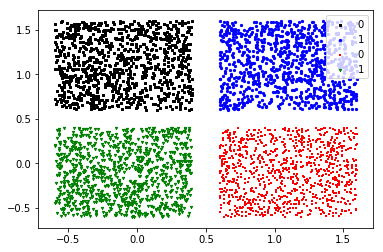

In [6]:
x = range(-2, 2)
y = range(-2,2)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(A['x'],A['y'], s=5, c='black', marker="s", label='0')
ax1.scatter(B['x'],B['y'], s=5, c='blue', marker="o", label='1')
ax1.scatter(C['x'],C['y'], s=5, c='red', marker="+", label='0')
ax1.scatter(D['x'],D['y'], s=5, c='green', marker="v", label='1')
plt.legend(loc='upper right');
plt.show()

create a dataset with the 4 clusters for  training the model

In [22]:
#concatenate the 4 clusters in one data frame:
df=pd.concat([A,B,C,D])

#create the dataframes y_trn with only the label column:
y_trn=df['label']

#create the dataframes X_trn with the values of the data without the label column:
X_trn=df.drop('label', axis = 1)

print(df.head())
print(y_trn.shape)
print(X_trn.shape)

          x         y  label
0 -0.344706  1.411591      0
1 -0.115443  0.783213      0
2  0.343223  0.877042      0
3  0.106179  0.967546      0
4 -0.486752  0.941811      0
(4000,)
(4000, 2)


Split the pandas dataframes X_trn, y_trn into random X_train and X_test subsets


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size = 0.2, random_state=420)

print(X_train.shape)
print(X_test.shape)

(3200, 2)
(800, 2)


train the model with the training set X_train and y_train, I choose 1 hidden layer of 5 neurons, I choose the activation 'relu' and the solver 'lbfgs' to optimize the model with the log-loss function, the alpha is 1e-8, With these parameters for the data, the model converge easily to the minimum without too much overfitting thanks to alpha not too low.

In [26]:
model = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-8,hidden_layer_sizes=(5), random_state=1)

model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Evaluate the model with predictions:

In [28]:
predictions=model.predict(X_test)
#predictions

I use SciKit-Learn’s built in metrics with a classification report, accuracy score to evaluate how well the model performed.

In [43]:
print(classification_report(y_test,predictions))
print("#####################################################")
print('The score is {}'.format(accuracy_score(y_test,predictions, normalize=True)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       404
          1       1.00      1.00      1.00       396

avg / total       1.00      1.00      1.00       800

#####################################################
The score is 1.0


The model has an accuracy score of 100%, he predict well all the values of y_test without error.
with less than 5 hidden layers the model don't converge correctly and the accuracy is a low.

The model classifies very well the values of X_trn and y_trn with their 2 label associate as you can see on the plot below:
square label 0 and triangle label 1

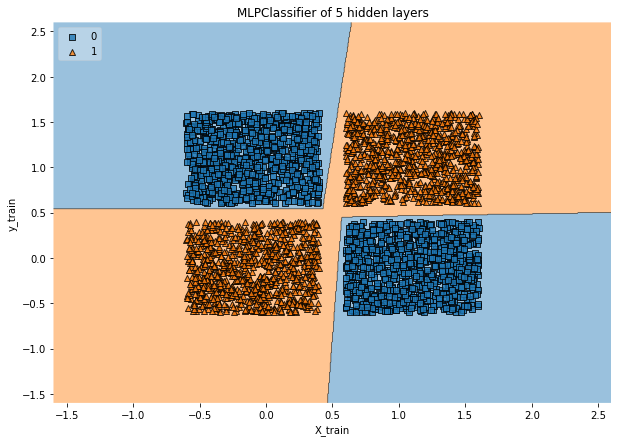

In [56]:
plt.figure(figsize=(10,7))
#the data must be in an array format for the plot
X_trn=np.array(X_trn)
y_trn=np.array(y_trn)

plot_decision_regions(X_trn, y_trn, clf=model, legend=2)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('MLPClassifier of 5 hidden layers')
plt.show()

Encode the 4 clusters for a new classifier
each cluster has a unique label: A1=0, B1=1, C1=2, D1=3

In [46]:
q=0.6

A1 = pd.DataFrame()
B1 = pd.DataFrame()
C1 = pd.DataFrame()
D1 = pd.DataFrame()


A1['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
A1['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
A1['label']= 0

B1['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
B1['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
B1['label']= 1


C1['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
C1['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
C1['label']= 2

D1['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
D1['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
D1['label']= 3

#concatenate the 4 clusters in one data frame:
df1=pd.concat([A1,B1,C1,D1])
df1.head()

,x,y,label
0,-0.032316,1.205694,0
1,0.023604,1.169464,0
2,-0.557731,1.261942,0
3,-0.531178,1.102582,0
4,-0.137946,1.525047,0


create the training samples for the new model

In [48]:
#create the dataframes y_tr with only the label column:
y_tr=df1['label']

#create the dataframes X_tr with the values of the data without the label column:
X_tr=df1.drop('label', axis = 1)

#Split the pandas dataframes X_tr, y_tr into random X_train1 and X_test1 subsets:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tr, y_tr, test_size = 0.2, random_state=420)

print(y_train1.shape)
print(X_train1.shape)

(3200,)
(3200, 2)


In [49]:
model1 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-8,hidden_layer_sizes=(5), random_state=1)

model1.fit(X_train1, y_train1)

MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [57]:
#Evaluate the model with predictions:
predictions1=model1.predict(X_test1)
#predictions1

In [59]:
print(classification_report(y_test1,predictions1))
print("###################################################")
print('The score is {}'.format(accuracy_score(y_test1,predictions1, normalize=True)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       199
          1       1.00      1.00      1.00       201
          2       1.00      1.00      1.00       205
          3       1.00      1.00      1.00       195

avg / total       1.00      1.00      1.00       800

###################################################
The score is 1.0


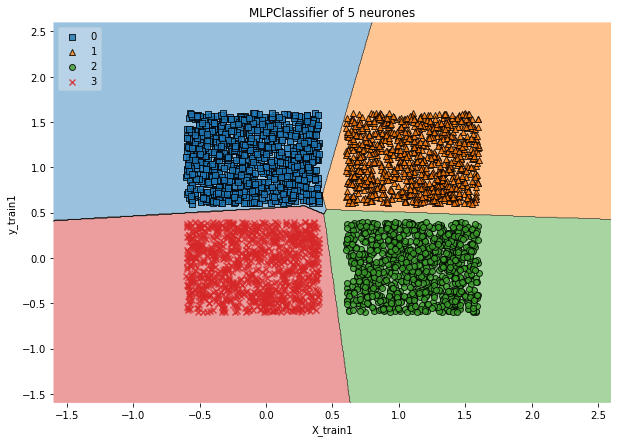

In [54]:
plt.figure(figsize=(10,7))
#the data must be in an array format for the plot
X_tr=np.array(X_tr)
y_tr=np.array(y_tr)

plot_decision_regions(X_tr, y_tr, clf=model1, legend=2)
plt.xlabel('X_train1')
plt.ylabel('y_train1')
plt.title('MLPClassifier of 5 neurones')
plt.show()

The model predict and classifies very well the data with 4 differents labels, only 5 hidden layers are needed to obtain a accuracy score of 100%.